# Script to format the Zemax files

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
from astropy.coordinates import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [44]:
def zemax_to_array(path_to_file):
    with open(path_to_file,'rb') as f:
        contents = f.read()
        
    contents = contents.decode("utf-16").split("\n")
    data_raw = [line.strip() for line in contents]
    
    metadata = []
    data = []
    
    for line in data_raw[:20]:
        if line != '':
            metadata.append(line)
            
    for line in data_raw[21:-1]:
        line = line.split("\t  ")
        line_formatted = [float(l) for l in line if l != '']
        data.append(line_formatted)
        
    return np.asarray(data), metadata

def rad_to_asec(angle):
    return angle*3600*180/np.pi

In [45]:
im_on, metadata_on = zemax_to_array('Toliman_on-axis_broadband.txt')
im_off, metadata_off = zemax_to_array('Toliman_off-axis_broadband.txt')

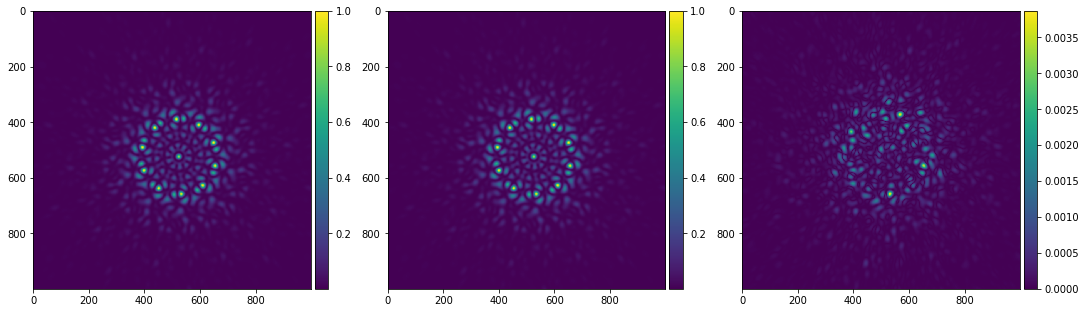

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(18,18))

on = axs[0].imshow(im_on[500:1500, 500:1500])
plt.colorbar(on, cax=make_axes_locatable(axs[0]).append_axes("right", size="5%", pad=0.05))

off = axs[1].imshow(im_off[500:1500, 500:1500])
plt.colorbar(off, cax=make_axes_locatable(axs[1]).append_axes("right", size="5%", pad=0.05))

diff = axs[2].imshow(np.abs(im_on-im_off)[500:1500, 500:1500])
plt.colorbar(diff, cax=make_axes_locatable(axs[2]).append_axes("right", size="5%", pad=0.05))

plt.show()

### Calcualte separation values


In [51]:
c1 = SkyCoord("14h39m36.49400s -60d50m02.3737s")
c2 = SkyCoord("14h39m35.06311s -60d50m15.0992s")
sep_asec = c1.separation(c2).arcsec
print("Separation arcseconds:", sep_asec)
print("Separation degrees:", sep_asec/3600)

Separation arcseconds: 16.472326595064594
Separation degrees: 0.0045756462764068315


In [52]:
num_pix = 2400
pix_spacing = 1.12e-6
fl = 0.15


fov_asec = rad_to_asec(num_pix * pix_spacing / fl)
fov_per_pix_asec = fov_asec/num_pix
pixel_sep = sep_asec/fov_per_pix_asec

print("FoV per pixel:", fov_per_pix_asec)
print(pixel_sep)

FoV per pixel: 1.5401105533116528
10.695548160256841


In [55]:
num_pix = 2000
# pix_spacing = 11e-6
pix_spacing = 1.75e-6
fl = 3.85

fov_asec = rad_to_asec(num_pix * pix_spacing / fl)
# fov_per_pix_asec = 0.375
fov_per_pix_asec = fov_asec/num_pix
pixel_sep = sep_asec/fov_per_pix_asec

print(fov_per_pix_asec)
print(pixel_sep)

0.09375673011231653
175.69220444581904


In [19]:
sep_micron = pixel_sep*pix_spacing*1e6
print(sep_micron)
# separation on the detector is 307.5 microns

307.46135778018333


**Alpha Cen A and B are seperared by 16 arcseconds, this corresponds to 44 pixels on the detector or 307.5 microns**

In [20]:
array_unit_size = 2.2
array_separation = round(sep_micron/array_unit_size)
print(array_separation)

140


### Overlay the two images

In [21]:
size = im.shape[0]
final_array_size = size - array_separation
array = np.zeros([final_array_size, final_array_size])
shift = round(array_separation/2)

array = im[shift:size-shift, 0:final_array_size] + im[shift:size-shift, array_separation:size]

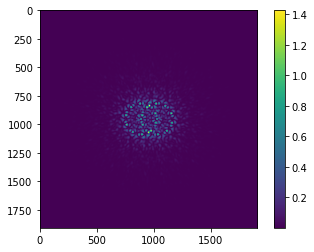

In [22]:
s = array.shape[0]
c = s//2
d = s
plt.imshow(array[c-d//2:c+d//2, c-d//2:c+d//2])
plt.colorbar()